# **Exploratory Data Analysis of IPL-Matches(2008-2022)**

In [21]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings("ignore")

In [22]:
IPL_matches_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/IPL_Matches_2008_2022.csv')

***Data Pre-processing :-***

In [23]:
IPL_matches_df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [24]:
IPL_matches_df.tail()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri
949,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen


In [25]:
IPL_matches_df.shape

(950, 20)

In [26]:
IPL_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [27]:
IPL_matches_df.describe()

,ID,Margin
count,9.500000e+02,932.000000
mean,8.304852e+05,17.056867
std,3.375678e+05,21.633109
min,3.359820e+05,1.000000
25%,5.012612e+05,6.000000
50%,8.297380e+05,8.000000
75%,1.175372e+06,19.000000
max,1.312200e+06,146.000000


In [28]:
IPL_matches_df.nunique()

ID                 950
City                33
Date               706
Season              15
MatchNumber         80
Team1               18
Team2               18
Venue               49
TossWinner          18
TossDecision         2
SuperOver            2
WinningTeam         18
WonBy                4
Margin              94
method               1
Player_of_Match    262
Team1Players       932
Team2Players       937
Umpire1             58
Umpire2             60
dtype: int64

*Naming cities by knowing their venues*

In [29]:
IPL_matches_df.loc[(IPL_matches_df['Venue'] == 'Dubai International Cricket Stadium'),['City']] = 'Dubai'
IPL_matches_df.loc[(IPL_matches_df['Venue'] == 'Sharjah Cricket Stadium'),['City']] = 'Sharjah'
IPL_matches_df['SuperOver'].fillna('NoResult',inplace=True)
IPL_matches_df['WinningTeam'].fillna('NoResult',inplace=True)
IPL_matches_df['Player_of_Match'].fillna('NoResult',inplace= True)
IPL_matches_df['Margin'].fillna('NoMargin',inplace = True)

*Drop columns which are unnecessary*

In [30]:
IPL_matches_df=IPL_matches_df.drop(['method', 'Umpire1', 'Umpire2', 'SuperOver'],axis =1 )

*Renaming team-names :-*

In [31]:
IPL_matches_df['Team1']=IPL_matches_df['Team1'].str.replace('Kings XI Punjab','Punjab Kings')
IPL_matches_df['Team2']=IPL_matches_df['Team2'].str.replace('Kings XI Punjab','Punjab Kings')
IPL_matches_df['WinningTeam']=IPL_matches_df['WinningTeam'].str.replace('Kings XI Punjab','Punjab Kings')

IPL_matches_df['Team1']=IPL_matches_df['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
IPL_matches_df['Team2']=IPL_matches_df['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')
IPL_matches_df['WinningTeam']=IPL_matches_df['WinningTeam'].str.replace('Delhi Daredevils','Delhi Capitals')

IPL_matches_df['Team1']=IPL_matches_df['Team1'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
IPL_matches_df['Team2']=IPL_matches_df['Team2'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
IPL_matches_df['WinningTeam']=IPL_matches_df['WinningTeam'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

*Data after cleansing :-*

In [32]:
IPL_matches_df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan..."
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda..."
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan..."
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',..."


In [33]:
IPL_matches_df.Team1.unique().reshape(15,1)

array([['Rajasthan Royals'],
       ['Royal Challengers Bangalore'],
       ['Sunrisers Hyderabad'],
       ['Delhi Capitals'],
       ['Chennai Super Kings'],
       ['Gujarat Titans'],
       ['Lucknow Super Giants'],
       ['Kolkata Knight Riders'],
       ['Punjab Kings'],
       ['Mumbai Indians'],
       ['Rising Pune Supergiant'],
       ['Gujarat Lions'],
       ['Pune Warriors'],
       ['Deccan Chargers'],
       ['Kochi Tuskers Kerala']], dtype=object)

**Total matches played by each team :-**

In [34]:
match_df = pd.concat([IPL_matches_df['Team1'],IPL_matches_df['Team2']]).value_counts().reset_index()
match_df.set_axis(['Teams','Total_Matches'],axis = 'columns' ,inplace = True)
match_df

,Teams,Total_Matches
0,Mumbai Indians,231
1,Royal Challengers Bangalore,226
2,Delhi Capitals,224
3,Kolkata Knight Riders,223
4,Punjab Kings,218
5,Chennai Super Kings,208
6,Rajasthan Royals,192
7,Sunrisers Hyderabad,152
8,Deccan Chargers,75
9,Pune Warriors,46


In [35]:
def get_color(name, number):
    pal = list(sns.color_palette(palette=name, n_colors=number).as_hex())
    return pal
pal_vi = get_color('hot', len(match_df))

In [36]:
!pip install plotly --upgrade --quiet

In [37]:
import plotly.express as px
fig = px.bar(match_df, x='Teams', y='Total_Matches', text='Total_Matches',
             color ='Teams', color_discrete_sequence=pal_vi)

fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout({'plot_bgcolor': 'white',
                   'paper_bgcolor': 'white'})

fig.update_layout(width=1100, height=500,
                  margin = dict(t=15, l=15, r=15, b=15))
fig.show()

**Win/Loss Ratio Analysis :-**

In [38]:
win_df = match_df
win_df['Total_wins']=IPL_matches_df['WinningTeam'].value_counts().reset_index()['WinningTeam']
win_df['win_ratio']= round((win_df['Total_wins']/win_df['Total_Matches']),2)*100
win_df

,Teams,Total_Matches,Total_wins,win_ratio
0,Mumbai Indians,231,131,57.0
1,Royal Challengers Bangalore,226,121,54.0
2,Delhi Capitals,224,114,51.0
3,Kolkata Knight Riders,223,109,49.0
4,Punjab Kings,218,103,47.0
5,Chennai Super Kings,208,101,49.0
6,Rajasthan Royals,192,96,50.0
7,Sunrisers Hyderabad,152,75,49.0
8,Deccan Chargers,75,29,39.0
9,Pune Warriors,46,15,33.0


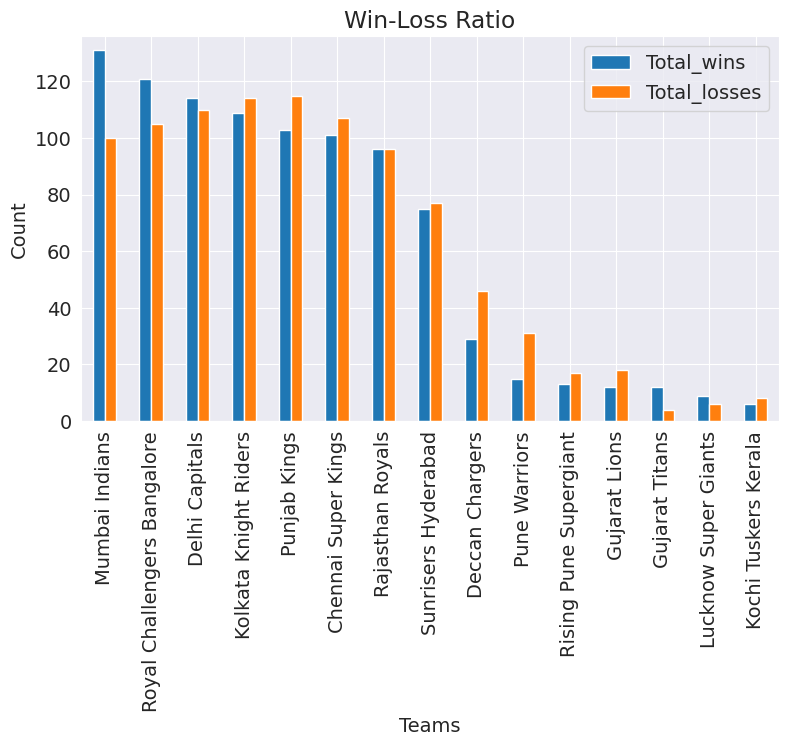

In [39]:
import pandas as pd

# Example DataFrame (replace with your actual data)
data = {'Team': win_df['Teams'],
        'Total_wins': win_df['Total_wins'],
        'Win/Loss': win_df['win_ratio']}

df = pd.DataFrame(data)

# Calculate win-loss ratio
df['Total_losses'] = win_df['Total_Matches'] - win_df['Total_wins']

# Create a bar plot
df.plot(x='Team', y=['Total_wins', 'Total_losses'], kind='bar', title='Win-Loss Ratio')
plt.ylabel('Count')
plt.xlabel('Teams')
plt.ylim(0, max(df['Total_wins'].max(), df['Total_losses'].max()) + 5)  # Adjust y-axis limit

plt.show()

***Top 10 Cities to host most IPL Matches :-***

In [40]:
citraw = IPL_matches_df['City'].value_counts().reset_index()
citraw.set_axis(['City','Number_of_Matches'],axis = 'columns' ,inplace = True)
top10_city_host = citraw.head(10)
top10_city_host

,City,Number_of_Matches
0,Mumbai,159
1,Kolkata,79
2,Delhi,78
3,Chennai,67
4,Bangalore,65
5,Hyderabad,64
6,Chandigarh,56
7,Pune,51
8,Jaipur,47
9,Dubai,46


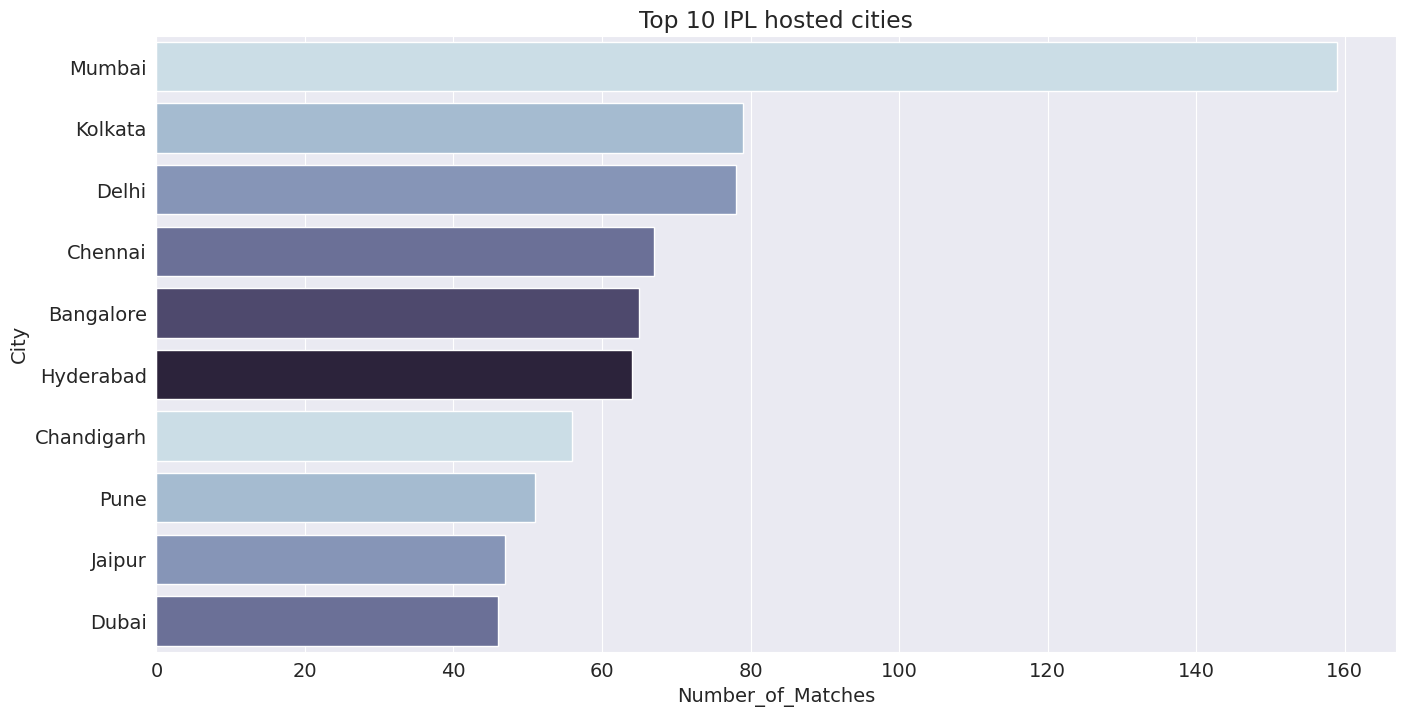

In [41]:
plt.figure(figsize=(16,8))
palette_color = sns.color_palette("ch:s=.25,rot=-.25")
sns.barplot(x='Number_of_Matches', y='City',palette = palette_color, data=top10_city_host);
plt.title('Top 10 IPL hosted cities');

***Number of Matches hosted each Seasons :-***

In [42]:
IPL_matches_df["Season"]=pd.DatetimeIndex(IPL_matches_df["Date"]).year
matches_in_season=IPL_matches_df.groupby(['Season'])['ID'].count().reset_index().rename(columns={'ID':'matches'})
matches_in_season

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


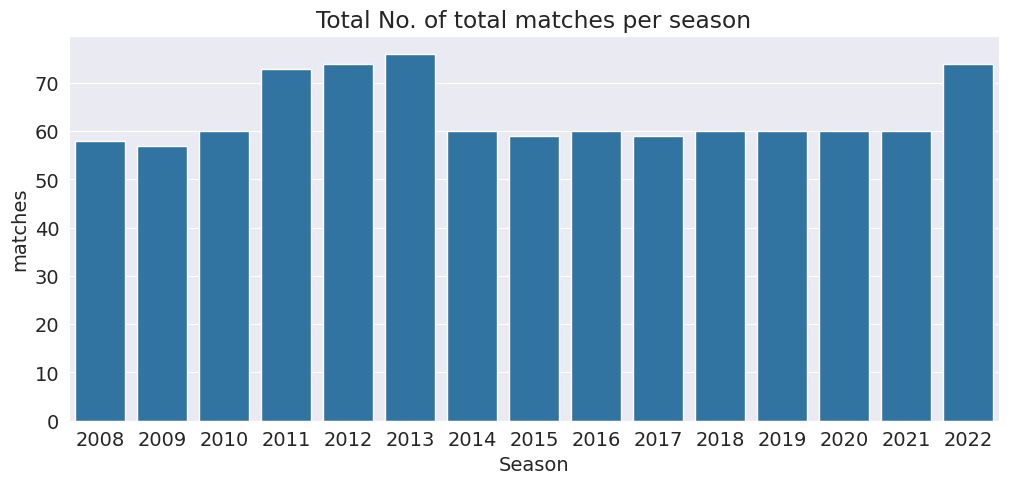

In [43]:
plt.figure(figsize=(12,5))

sns.barplot(x='Season', y='matches', data=matches_in_season);
plt.title('Total No. of total matches per season');

***Teams with the most TOSS wins :-***

In [44]:
most_toss_winner = IPL_matches_df['TossWinner'].value_counts().reset_index()
most_toss_winner.set_axis(['Team_Name','Tosses_Won'],axis = 'columns' ,inplace = True)
most_toss_winner

,Team_Name,Tosses_Won
0,Mumbai Indians,123
1,Kolkata Knight Riders,114
2,Chennai Super Kings,109
3,Royal Challengers Bangalore,105
4,Rajasthan Royals,99
5,Kings XI Punjab,85
6,Delhi Daredevils,80
7,Sunrisers Hyderabad,74
8,Deccan Chargers,43
9,Delhi Capitals,36


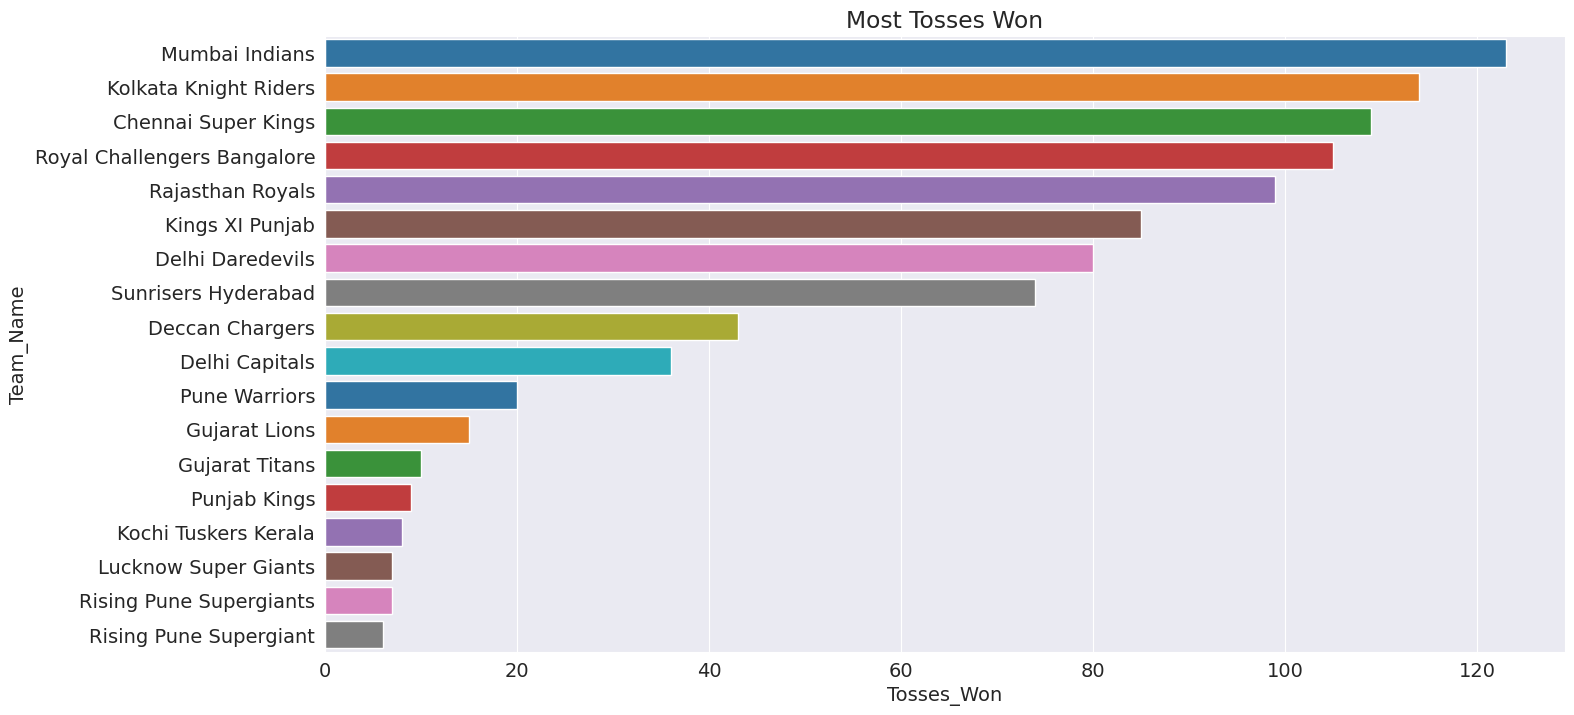

In [45]:
plt.figure(figsize=(16,8))
palette_color = sns.color_palette("tab10")
sns.barplot(x='Tosses_Won', y='Team_Name',palette = palette_color, data=most_toss_winner);
plt.title('Most Tosses Won');

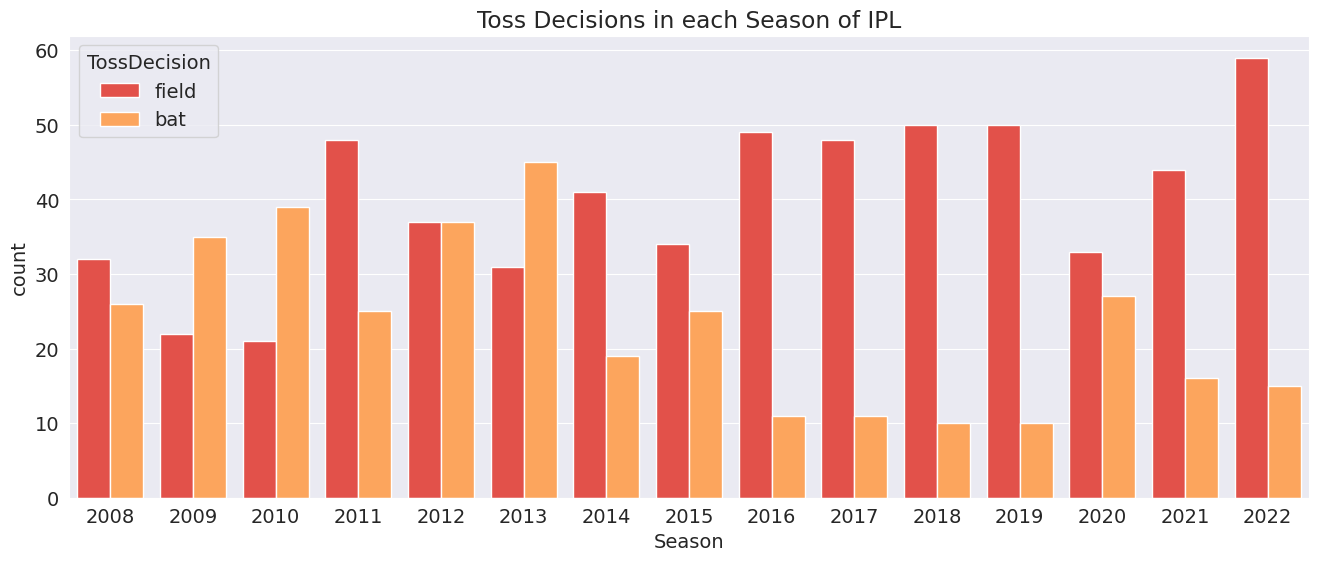

In [46]:
plt.figure(figsize=(16,6))
color_palette = sns.color_palette("Spectral")
sns.countplot(x='Season', hue='TossDecision', data=IPL_matches_df,palette=color_palette,saturation=1)
plt.title('Toss Decisions in each Season of IPL');

In [47]:
toss_decision_ratio = IPL_matches_df.TossDecision.value_counts()
toss_decision_ratio

field    599
bat      351
Name: TossDecision, dtype: int64

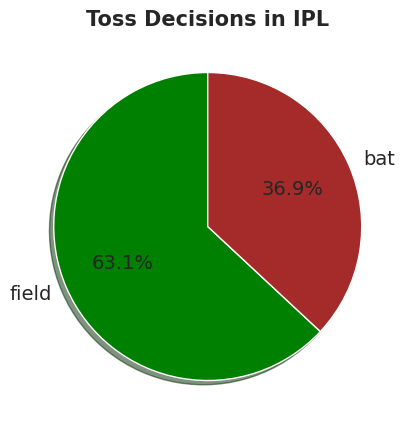

In [48]:
labels = (np.array(toss_decision_ratio.index))
sizes = (np.array((toss_decision_ratio / toss_decision_ratio.sum())*100))
colors = ['green', 'brown']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss Decisions in IPL",fontweight="bold",fontsize=15)
plt.show()

In [49]:
toss_vs_matchwin = (IPL_matches_df.TossWinner==IPL_matches_df.WinningTeam).value_counts()
toss_vs_matchwin

False    535
True     415
dtype: int64

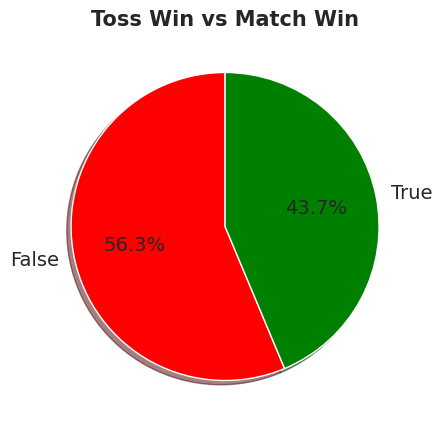

In [50]:
labels = (np.array(toss_vs_matchwin.index))
sizes = (np.array((toss_vs_matchwin / toss_vs_matchwin.sum())*100))
colors = ['red', 'green']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss Win vs Match Win",fontweight="bold",fontsize=15)
plt.show()

**Results of the IPL Finals :-**

In [51]:
final_df = IPL_matches_df.loc[(IPL_matches_df['MatchNumber']=='Final')][['City','Team1','Team2','WinningTeam']].reset_index().drop(['index'],axis=1)
final_df

,City,Team1,Team2,WinningTeam
0,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans
1,Dubai,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings
2,Dubai,Delhi Capitals,Mumbai Indians,Mumbai Indians
3,Hyderabad,Mumbai Indians,Chennai Super Kings,Mumbai Indians
4,Mumbai,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings
5,Hyderabad,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians
6,Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad
7,Kolkata,Mumbai Indians,Chennai Super Kings,Mumbai Indians
8,Bangalore,Kolkata Knight Riders,Punjab Kings,Kolkata Knight Riders
9,Kolkata,Chennai Super Kings,Mumbai Indians,Mumbai Indians


In [52]:
from collections import Counter

winner_array = final_df['WinningTeam'].unique()
winner_teamnames = list(Counter(winner_array).keys())
winner_frequency = list(Counter(final_df['WinningTeam']).values())
print(winner_teamnames)
print(winner_frequency)

['Gujarat Titans', 'Chennai Super Kings', 'Mumbai Indians', 'Sunrisers Hyderabad', 'Kolkata Knight Riders', 'Deccan Chargers', 'Rajasthan Royals']
[1, 4, 5, 1, 2, 1, 1]


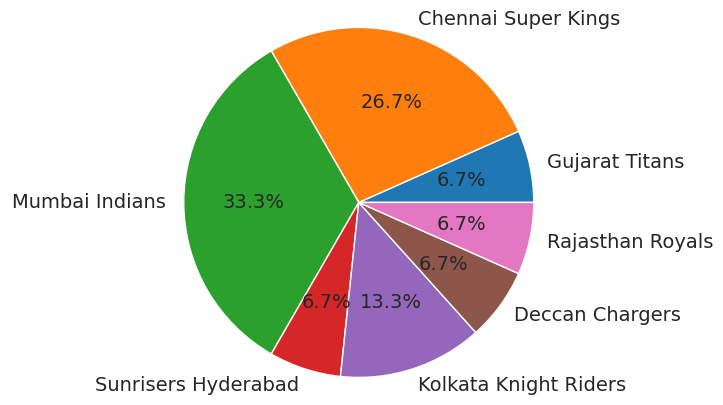

In [53]:
plt.pie(winner_frequency, labels=winner_teamnames, autopct='%1.1f%%')
plt.axis('equal')
plt.show()